In [1]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import Prophet
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Data/Kaggle/StoreSales/train_darts.csv", parse_dates=["date"])

In [3]:
df = df[(df['store_nbr'] == 1) & (df['family'] == 3)]

In [4]:
df.set_index('date', inplace=True)

In [5]:
df.head()

,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
date,,,,,,,,,,,,,,
2013-01-01,1,3,0.0,0,3,93.14000,18,12,3,13,2,1,1,2013
2013-01-02,1,3,1091.0,0,4,93.14000,18,12,3,13,3,2,1,2013
2013-01-03,1,3,919.0,0,4,92.97000,18,12,3,13,4,3,1,2013
2013-01-04,1,3,953.0,0,4,93.12000,18,12,3,13,5,4,1,2013
2013-01-05,1,3,1160.0,0,4,93.12009,18,12,3,13,6,5,1,2013


In [6]:
ts = TimeSeries.from_dataframe(df, value_cols=["sales"], freq='d')

In [7]:
split_ratio = 0.8
training_size = int(len(ts) * split_ratio)
train = ts[:training_size]
val = ts[training_size:]

In [8]:
model = Prophet()
model.fit(train)

23:02:32 - cmdstanpy - INFO - Chain [1] start processing
23:02:32 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [9]:
predictions = model.predict(n=len(val))

In [10]:
val = val.pd_series().tolist()
predictions = predictions.pd_series().tolist()

In [13]:
predictions = np.maximum(predictions, 0)

In [14]:
nan_indices = np.isnan(val)
nan_count = np.sum(nan_indices)

In [15]:
if nan_count > 0:
    print(f"There are {nan_count} NaN values in the data.")

There are 1 NaN values in the data.


In [16]:
val = np.nan_to_num(val, nan=0.0)

In [17]:
rmse = np.sqrt(mean_squared_error(val, predictions))
rmsle = np.sqrt(mean_squared_error(np.log1p(val), np.log1p(predictions)))

In [18]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

Root Mean Squared Error (RMSE): 437.7748678561846
Root Mean Squared Logarithmic Error (RMSLE): 0.6053531680320735


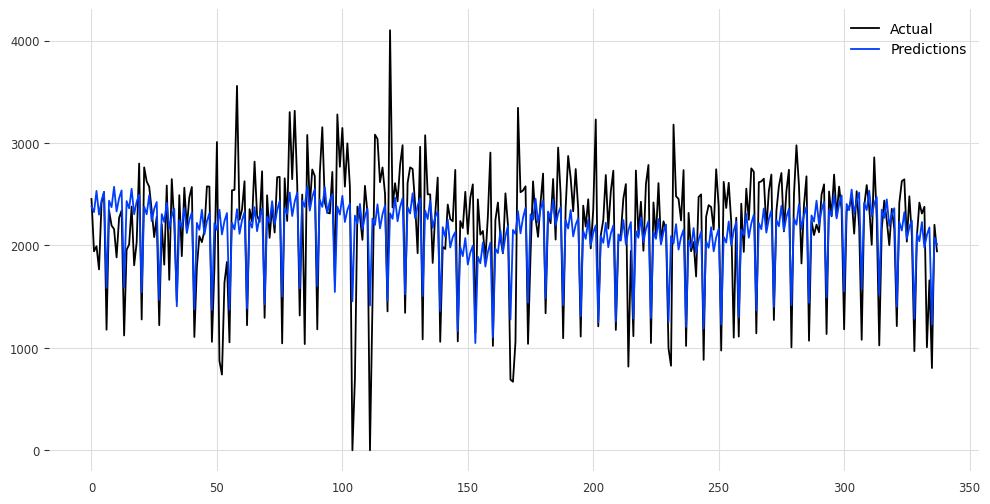

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(val, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()